<h1> Main.ipynb </h1>
<h2> 1. Import libraries and modules </h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


from src.Data_Retriever import DataRetriever as DatRet

from src.Optimization.Markowitz_PT import MarkowitzPT as MPT

# from src.Optimization.Environment import PortfolioEnvironment as PorEnv
# from src.Optimization.RLModelCompilation import RL_Model as RLM
from src.Optimization.NeuralNet import CustomNeuralNet as CusNN
from src.Optimization.NeuralNet import CustomSACPolicy as CSACP

from src.Result.Menchero_OGA import MencheroOGA as MOGA
from src.Result.IndPortResults import GenerateResult as GR
from src.Result.OverviewResults import ResultConveyor as RC

<h2> 2. Define operating variables </h2>

In [7]:
# Define necessary non-fixed variables
trading_n = 30
history_usage = 100
n_sectors = 6
n_stocks_per_sector = 4

# For RL algorithm
history_usage_RL = 10

<h2> 3. Define stock dataframe </h2>

In [3]:
# Defining stock pool
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",]
ticker_df["Seafood (food)"] = ["ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL"]
ticker_df["Materials"] = ["NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL"]
ticker_df["Technologies"] = ["TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL"]
ticker_df["Financial"] = ["STB.OL", "DNB.OL", "GJF.OL", "AKER.OL"]
ticker_df["Shipping"] = ["WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]
ticker_df

,Petroleum,Seafood (food),Materials,Technologies,Financial,Shipping
0,EQNR.OL,ORK.OL,NHY.OL,TEL.OL,STB.OL,WAWI.OL
1,AKRBP.OL,MOWI.OL,YAR.OL,NOD.OL,DNB.OL,SNI.OL
2,SUBC.OL,SALM.OL,RECSI.OL,ATEA.OL,GJF.OL,BELCO.OL
3,BWO.OL,LSG.OL,BRG.OL,BOUV.OL,AKER.OL,ODF.OL


<h2> 4. Define ESG array </h2>

In [4]:
# Defining ESG scores for respective securities
esg_scores = [36.6, 35.3, 17.9, 18, 
              18, 21.2, 18.7, 29.2, 
              15.7, 25.6, 25.6, 18.4, 
              19.8, 13.8, 18.1, 19, 
              17.2, 14, 17.2, 19.5, 
              19.7, 21.2, 26.8, 19.3]

In [ ]:
# my_df = pd.read_csv("Data/RL_weights_Return_esg_False.csv")

# alfa = GR("Return_esg_False", n_sectors, n_stocks_per_sector,100, esg_scores,ticker_df.columns)
# alfa.friple_frequency_analysis()

<h2> 5.-7. (Non-necessary for reproducability) </h2>
<h3>Data retrieval</h3>
<h3>Benchmark optimization (MPT)</h3>
<h3>RL optimization x4</h3>
<br>
All of the data has been generated an stored in csvs. Therefore, I can comment out the code lines below.

In [5]:
# # Retrieve data from yf API: y-m-d
# data = DatRet(ticker_df, "2013-01-01", "2024-01-01")
# # In function below, set log=True to check for data availability
# data.retrieve_data()

In [6]:

# # Generate benchmark weights thorugh MPT using Sharpe ratio
# benchmark = MPT(history_usage, trading_n)
# # IMPORTANT: In order to see  the effect of the weights, algo exclude last observation from optimization
# benchmark.frequency_optimizing()

In [7]:
# objectives = ["Return", "Sharpe", "Sortino", "Sterling", "Return", "Sharpe", "Sortino", "Sterling"]
# esg_compliancy = [True, True, True, True, False, False, False, False]

# for i in range(len(objectives)):
#     reinforcement = RLM(esg_scores, 
#                         objective=objectives[i],
#                         window_size=history_usage_RL,
#                         total_timesteps=5000,
#                         esg_compliancy=esg_compliancy[i],
#                         )
#     reinforcement.train_model()
#     reinforcement.test_model()

<h2> 8. Attribution analysis </h2>

In [8]:
paths = ["Return_esg_True", "Sharpe_esg_True",
         "Sortino_esg_True","Sterling_esg_True",
         "Return_esg_False", "Sharpe_esg_False",
         "Sortino_esg_False","Sterling_esg_False",]

analysis_list = []
for i in range(len(paths)):
    att_anal = GR(paths[i],
            n_sectors, n_stocks_per_sector,
            trading_n,
            esg_scores, 
            ticker_df.columns)
    att_anal.friple_frequency_analysis()
    analysis_list.append(att_anal)

----Analysis completed succesfully----
----Analysis completed succesfully----
----Analysis completed succesfully----
----Analysis completed succesfully----
----Analysis completed succesfully----
----Analysis completed succesfully----
----Analysis completed succesfully----
----Analysis completed succesfully----


<h2> X. Ad hoc analysis </h2>

In [9]:
theta = RC(analysis_list, trading_n)
theta.convey_results()

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.Data_Retriever import DataRetriever as DatRet

from src.Optimization.Markowitz_PT import MarkowitzPT as MPT

from src.Optimization.Environment import PortfolioEnvironment as PorEnv
from src.Optimization.RLModelCompilation import RL_Model as RLM
from src.Optimization.NeuralNet import CustomNeuralNet as CusNN
from src.Optimization.NeuralNet import CustomSACPolicy as CSACP

from src.Result.Menchero_OGA import MencheroOGA as MOGA
from src.Result.IndPortResults import GenerateResult as GR
from src.Result.OverviewResults import ResultConveyor as RC
from stable_baselines3.common.evaluation import evaluate_policy

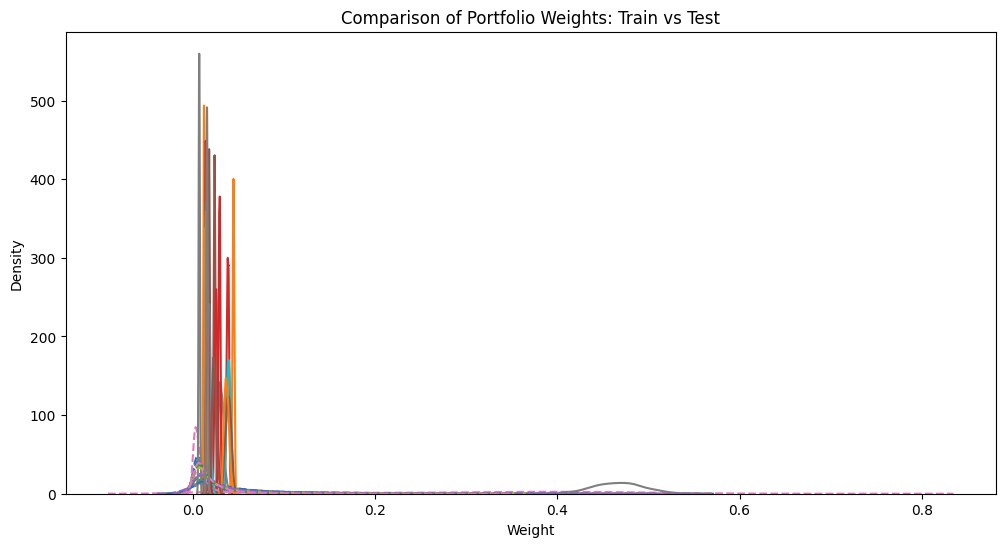

In [116]:
weights_history = pd.read_csv('C:\Programmering\jakob\BBAN5000-Master-Thesis\Data\RL_weights_Sortino_esg_True.csv')
weights_history_t = pd.read_csv('C:\Programmering\jakob\BBAN5000-Master-Thesis\Data\RL_weights_t_Sortino_esg_True.csv')

train_weights = np.array(weights_history_t)
test_weights = np.array(weights_history)

# Plot distributions
plt.figure(figsize=(12,6))
for i in range(train_weights.shape[1]):  # Iterate over assets
    sns.kdeplot(train_weights[:, i], label="Train Asset", linestyle="--")
    sns.kdeplot(test_weights[:, i], label="Test Asset")
    

plt.title("Comparison of Portfolio Weights: Train vs Test")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.show()

Train reward mean: 0   -5.600006
dtype: float64
Test reward mean: 0   -5.231557
dtype: float64


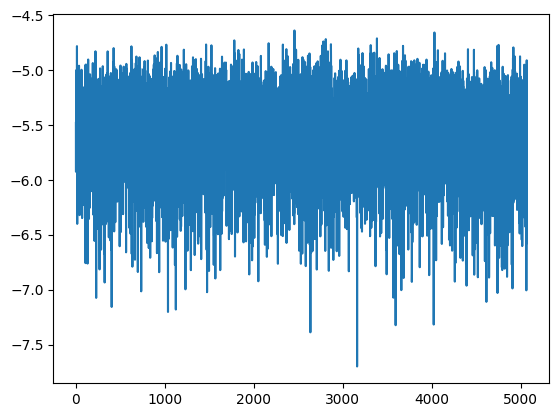

In [118]:
reward_history = pd.read_csv('C:\Programmering\jakob\BBAN5000-Master-Thesis\Data\RL_reward_Sortino_esg_True.csv')
reward_history_t = pd.read_csv('C:\Programmering\jakob\BBAN5000-Master-Thesis\Data\RL_reward_t_Sortino_esg_True.csv')

print('Train reward mean:', reward_history_t.mean())
print('Test reward mean:', reward_history.mean())

#plt.plot(np.cumprod(reward_history+1))
plt.plot(reward_history_t)
#plt.ylim(0,100)
plt.show()